In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve,auc
import warnings
warnings.filterwarnings("ignore")
import pickle

In [33]:
X = pd.read_csv('../data/processed/X_balmix01.csv')
y = pd.read_csv('../data/processed/y_balmix01.csv')

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10849, 11)
(2713, 11)
(10849, 1)
(2713, 1)


In [37]:
train = pd.concat([X_train, pd.DataFrame(y_train, columns=['loan_status'])], axis=1)



In [38]:
train

,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,mort_acc,loan_status
11676,36,8.90,139.72,2.0,44000.0,22.94,0.0,4318.0,58.4,20.0,0.0,0
3747,36,15.31,139.27,4.0,15000.0,31.20,0.0,4328.0,92.1,21.0,0.0,1
4911,36,6.62,313.18,5.0,111800.0,9.30,0.0,32387.0,40.5,53.0,3.0,0
6451,36,8.90,698.58,3.0,100000.0,9.42,0.0,12781.0,63.9,15.0,4.0,0
9548,36,9.76,437.31,2.0,36096.0,27.26,0.0,3174.0,43.5,10.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,36,17.77,540.56,10.0,120000.0,23.04,0.0,21623.0,62.2,36.0,3.0,0
3264,60,24.83,468.03,4.0,70000.0,15.72,0.0,11401.0,57.6,57.0,1.0,1
9845,36,14.09,492.79,5.0,109000.0,31.58,0.0,21930.0,69.2,27.0,4.0,0
10799,36,16.29,317.71,10.0,43000.0,11.55,0.0,8767.0,63.1,23.0,5.0,0


In [39]:
test = pd.concat([X_test, pd.DataFrame(y_test, columns=['loan_status'])], axis=1)

In [40]:
test

,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,mort_acc,loan_status
1861,36,8.90,79.39,0.0,21000.0,26.23,0.0,16146.0,80.3,11.0,0.000000,0
11971,36,15.81,315.57,10.0,45000.0,10.69,0.0,6599.0,88.0,19.0,0.000000,1
10411,36,15.31,633.68,8.0,61000.0,17.06,0.0,3698.0,88.0,21.0,4.000000,0
3998,36,22.45,783.85,6.0,70000.0,21.72,0.0,18596.0,93.9,33.0,4.000000,1
2686,36,12.69,161.02,6.0,48000.0,4.00,1.0,1361.0,64.8,7.0,1.590594,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5540,36,10.65,309.45,7.0,30000.0,19.84,0.0,9311.0,50.9,16.0,1.590594,0
2579,36,21.49,830.61,2.0,65000.0,13.89,0.0,17298.0,71.5,10.0,0.000000,1
882,36,18.75,484.02,6.0,85000.0,5.27,0.0,6121.0,69.5,18.0,0.000000,0
2576,36,12.12,665.44,0.0,90000.0,13.68,0.0,16205.0,85.3,14.0,0.000000,0


In [41]:
train.to_csv('../data/train/train_balmix01.csv', index=False)
test.to_csv('../data/test/test_balmix01.csv', index=False)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [43]:
log_reg = LogisticRegression(max_iter=1000)

In [44]:
cv_results = cross_val_score(log_reg, X, y, cv=10, scoring="roc_auc")
print(cv_results)
print(cv_results.mean())
print(cv_results.std())

[0.64160378 0.63639049 0.62637595 0.65687516 0.66446951 0.62923443
 0.63785557 0.62227965 0.63636759 0.62051757]
0.6371969700668675
0.01354045606313011


In [45]:
log_reg.fit(X_train_scal, y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred = log_reg.predict(X_test_scal)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [47]:
accuracy_score(y_test, y_pred)

0.6332473276815334

In [48]:
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[911, 450],
       [545, 807]], dtype=int64)

In [49]:
precision_score(y_test, y_pred)

0.6420047732696897

In [50]:
recall_score(y_test, y_pred)

0.5968934911242604

In [51]:
f1_score(y_test, y_pred)

0.6186278267535454

In [52]:
roc_auc_score(y_test, y_pred)

0.6331271276341361

In [53]:
y_pred_proba = log_reg.predict_proba(X_test_scal)
y_pred_proba

array([[0.57432434, 0.42567566],
       [0.46724319, 0.53275681],
       [0.48919455, 0.51080545],
       ...,
       [0.47512536, 0.52487464],
       [0.62335651, 0.37664349],
       [0.26271765, 0.73728235]])

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

Text(0, 0.5, 'True positive rate')

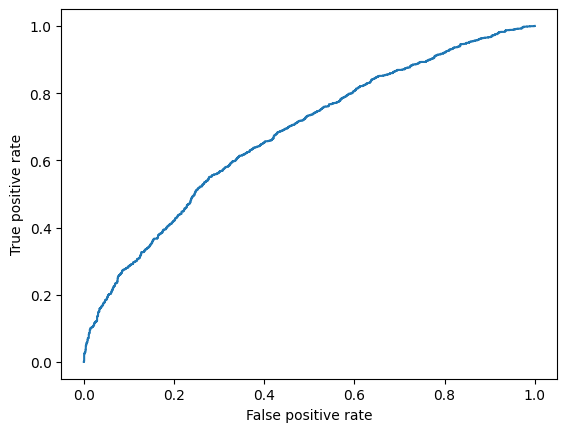

In [55]:
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [56]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

Text(0, 0.5, 'Precision')

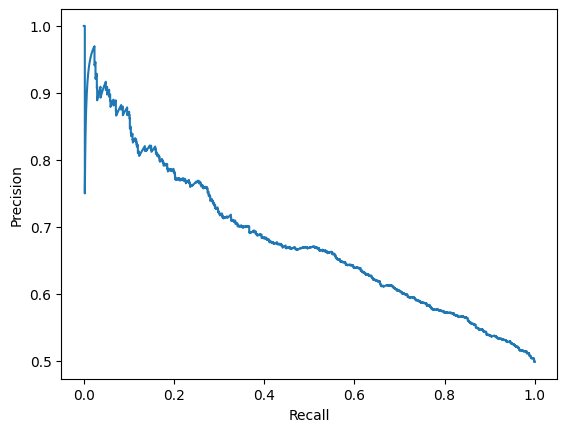

In [57]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:

    
# with open('my_model_primero_logreg.pkl', "wb") as archivo_salida:
#     pickle.dump(log_reg, archivo_salida)
